# Train Models
IMPORTANT INFO:

The `train_models.ipynb` notebook:
- Is a responsability of all members of a group. All of you should execute this and ensure it works as expected.
- Has to use the code done by each member in the group to generate features for the challenge.


`models`: A folder containing the trained models. This folder should be cre- ated by `train_models.ipynb` and models should be stored there after running `train_models.ipynb` notebook. The code should check if the folder is there and in such a case do not overwrite/store the models.

## Imports

In [ ]:
#--------------------------
MOUNT_GOOGLE_DRIVE = True
#--------------------------

if(MOUNT_GOOGLE_DRIVE==True):
  from google.colab import drive
  drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/Shareddrives/NLP-quora_challenge/

/content/gdrive/Shareddrives/NLP-quora_challenge


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np
import sklearn
import scipy
import os

import sys

import seaborn as sns
sns.set()

In [ ]:
################################################# a drive no em funciona :( #########################################################
#import functions from utils.py

# sys.path.append('/content/gdrive/Shareddrives/NLP-quora_challenge/')
# Import the module
#import utils

In [ ]:
#####################################################################################
###### DELETE THIS CELL BEFORE SUBMITTING, THEY ARE THE FUNCTIONS FROM UTILS! #######
#####################################################################################

def cast_list_as_strings(mylist):
    """
    return a list of strings
    """
    mylist_of_strings = []
    for x in mylist:
        mylist_of_strings.append(str(x))

    return mylist_of_strings


def get_features_from_df(df, count_vectorizer):
    """
    returns a sparse matrix containing the features build by the count vectorizer.
    Each row should contain features from question1 and question2.
    """
    q1_casted =  cast_list_as_strings(list(df["question1"]))
    q2_casted =  cast_list_as_strings(list(df["question2"]))

    ############### Begin exercise ###################
    # what is kaggle                  q1
    # What is the kaggle platform     q2
    X_q1 = count_vectorizer.transform(q1_casted)
    X_q2 = count_vectorizer.transform(q2_casted)
    X_q1q2 = scipy.sparse.hstack((X_q1,X_q2))
    ############### End exercise ###################

    return X_q1q2


def get_mistakes(clf, X_q1q2, y):
    '''
    Make a function get_mistakes that given a model clf a dataframe df, the features X_q1q2 and the target labels yreturns
    - incorrect_indices: coordinates where the model made a mistake
    - predictions: predictions made by the model
    '''

    ############### Begin exercise ###################
    predictions = clf.predict(X_q1q2)
    incorrect_predictions = predictions != y
    incorrect_indices,  = np.where(incorrect_predictions)

    ############### End exercise ###################

    if np.sum(incorrect_predictions)==0:
        print("no mistakes in this df")
    else:
        return incorrect_indices, predictions

def print_mistake_k(k, mistake_indices, predictions):
    print(train_df.iloc[mistake_indices[k]].question1)
    print(train_df.iloc[mistake_indices[k]].question2)
    print("true class:", train_df.iloc[mistake_indices[k]].is_duplicate)
    print("prediction:", predictions[mistake_indices[k]])

## Load Data

From the problem guide the teacher says:

This is a Kaggle challenge: There is no validation/test data with labels.
Therefore you have to create the following split in order to share the same train validation and test splits across teams:

In [ ]:
path_folder_quora = 'nlp_deliv1_materials/'

# Train and Validation data
train_df = pd.read_csv(os.path.join(path_folder_quora, "quora_train_data.csv"))
# use this to provide the expected generalization results
test_df = pd.read_csv(os.path.join(path_folder_quora,"quora_test_data.csv"))

A_df, te_df = sklearn.model_selection.train_test_split(train_df, test_size=0.05, random_state=123)
tr_df, va_df = sklearn.model_selection.train_test_split(A_df, test_size=0.05, random_state=123)

In [ ]:
# dividng X and y for each dataset
y_tr = tr_df['is_duplicate'].values
X_tr_df = tr_df.drop(['is_duplicate'], axis =1)

y_va = va_df['is_duplicate'].values
X_va_df = va_df.drop(['is_duplicate'], axis =1)

y_te = te_df['is_duplicate'].values
X_te_df = te_df.drop(['is_duplicate'], axis =1)

print(f'Training:\n X train {X_tr_df.shape}\n y train {y_tr.shape}\n {"-"*20}')
print(f'Validation:\n X val {X_va_df.shape}\n y val {y_va.shape}\n {"-"*20}')
print(f'Test:\n X test {X_te_df.shape}\n y test {y_te.shape}\n {"-"*20}')

Training:
 X train (291897, 5)
 y train (291897,)
 --------------------
Validation:
 X val (15363, 5)
 y val (15363,)
 --------------------
Test:
 X test (16172, 5)
 y test (16172,)
 --------------------


# Simple Solution

#### example
(creo q es un ejemplo, no entiendo pq lo hace en `delivery_1_quora.ipynb`)

In [ ]:
# convert input data into list of strings (example)

q1_train =  cast_list_as_strings(list(X_tr_df["question1"]))
q2_train =  cast_list_as_strings(list(X_tr_df["question2"]))

q1_val =  cast_list_as_strings(list(X_va_df["question1"]))
q2_val =  cast_list_as_strings(list(X_va_df["question2"]))

q1_test =  cast_list_as_strings(list(X_te_df["question1"]))
q2_test =  cast_list_as_strings(list(X_te_df["question2"]))

Use all the questions in train and test partitions to build a single list all_questions to fit the count_vectorizer

In [ ]:
# example
all_q_train = q1_train+q2_train

In [ ]:
# example
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,1))
count_vectorizer.fit(all_q_train)

CountVectorizer()

## simple solution

In [ ]:
# get features (concatenating q1+q2)
X_tr_q1q2 = get_features_from_df(X_tr_df, count_vectorizer)
X_va_q1q2 = get_features_from_df(X_va_df, count_vectorizer)
X_te_q1q2 = get_features_from_df(X_te_df, count_vectorizer)

In [ ]:
print(f'Training:\n X train {X_tr_q1q2.shape}\n {"-"*20}')
print(f'Validation:\n X val {X_va_q1q2.shape}\n{"-"*20}')
print(f'Test:\n X test {X_te_q1q2.shape}\n{"-"*20}')

Training:
 X train (291897, 149650)
 --------------------
Validation:
 X val (15363, 149650)
--------------------
Test:
 X test (16172, 149650)
--------------------


In [ ]:
logistic = sklearn.linear_model.LogisticRegression(solver="liblinear",
                                                   random_state=123)
y_train = train_df["is_duplicate"].values
logistic.fit(X_tr_q1q2, y_tr)

LogisticRegression(random_state=123, solver='liblinear')

In [ ]:
y_pred = logistic.predict(X_va_q1q2)

In [ ]:
# evaluate
sklearn.metrics.confusion_matrix(y_va, y_pred)

array([[8047, 1649],
       [2207, 3460]])

In [ ]:
print(sklearn.metrics.classification_report(y_va, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.78      0.83      0.81      9696
    Positive       0.68      0.61      0.64      5667

    accuracy                           0.75     15363
   macro avg       0.73      0.72      0.72     15363
weighted avg       0.75      0.75      0.75     15363



Text(28.75, 0.5, 'Actual')

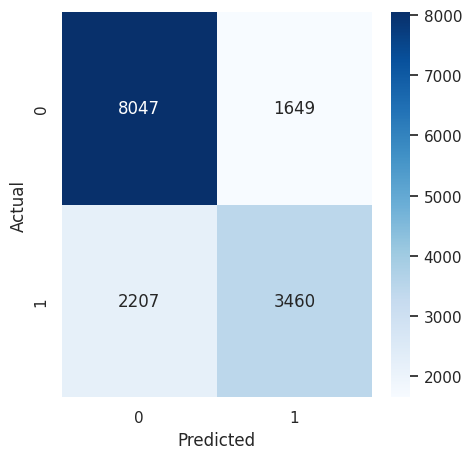

In [ ]:
cm = sklearn.metrics.confusion_matrix(y_va, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Dubtes x el profe
- la delivery1quora notebook q fa?
- podem fer plots x ensenyar resultats a reproduce results?
- q vol de la simple solution?

### Saving simple model
Creating model folder + saving

# Improved Solution